<a href="https://colab.research.google.com/github/Harshi07-c/EDA_CHALLENGE/blob/main/EDA_CHALLENGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import numpy as np

In [89]:
df = pd.read_csv("/content/world-data-2023.csv")
df.head()

,Country,Density (P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"6,52,230","3,23,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"3,80,41,754",48.90%,9.30%,71.40%,11.12%,"97,97,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"28,54,191",55.70%,18.60%,36.60%,12.33%,"17,47,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"23,81,741","3,17,000",24.28,213.0,Algiers,"1,50,006",...,28.10%,1.72,"4,30,53,054",41.20%,37.20%,66.10%,11.70%,"3,15,10,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"12,46,700","1,17,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"3,18,25,295",77.50%,9.20%,49.10%,6.89%,"2,10,61,025",-11.202692,17.873887


In [90]:
df.shape

(195, 35)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density    (P/Km2)                         195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

In [92]:
columns_to_drop = ['Abbreviation', 'Currency-Code','Calling Code','Largest city','Capital/Major City',"Latitude","Longitude"]
df = df.drop(columns=columns_to_drop)


In [93]:
# Convert specific columns to numeric
columns_to_convert = ["Density    (P/Km2)", "Land Area(Km2)", "Urban_population", "Unemployment rate", "Total tax rate", "Tax revenue (%)", "Population: Labor force participation (%)", "Out of pocket health expenditure", "Co2-Emissions", "CPI", "Gross tertiary education enrollment (%)", "Gross primary education enrollment (%)", "Armed Forces size", "Agricultural Land( %)", "Forested Area (%)", "Gasoline Price", "GDP", "CPI Change (%)", "Minimum wage", "Population"]

for column in columns_to_convert:
    # Remove symbols and convert to numeric
    df[column] = pd.to_numeric(df[column].replace('[\$,%]', '', regex=True), errors='coerce')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density    (P/Km2)                         195 non-null    int64  
 2   Agricultural Land( %)                      188 non-null    float64
 3   Land Area(Km2)                             194 non-null    float64
 4   Armed Forces size                          171 non-null    float64
 5   Birth Rate                                 189 non-null    float64
 6   Co2-Emissions                              188 non-null    float64
 7   CPI                                        178 non-null    float64
 8   CPI Change (%)                             179 non-null    float64
 9   Fertility Rate                             188 non-null    float64
 10  Forested Area (%)         

In [94]:
# List to store numeric column names
numeric_columns = []

# List to store categorical column names
categorical_columns = []

# Iterate through the columns of the DataFrame
for column in df.columns:
    # Check if the column has numeric data type
    if pd.api.types.is_numeric_dtype(df[column]):
        numeric_columns.append(column)
    else:
        categorical_columns.append(column)

# Display the lists
print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)

Numeric Columns: ['Density    (P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Co2-Emissions', 'CPI', 'CPI Change (%)', 'Fertility Rate', 'Forested Area (%)', 'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)', 'Infant mortality', 'Life expectancy', 'Maternal mortality ratio', 'Minimum wage', 'Out of pocket health expenditure', 'Physicians per thousand', 'Population', 'Population: Labor force participation (%)', 'Tax revenue (%)', 'Total tax rate', 'Unemployment rate', 'Urban_population']
Categorical Columns: ['Country', 'Official language']


## HANDLING NULL VALUES : IMPUTING USING KNN

In [95]:
null_value = df.isnull().sum()
null_value

Country                                       0
Density    (P/Km2)                            0
Agricultural Land( %)                         7
Land Area(Km2)                                1
Armed Forces size                            24
Birth Rate                                    6
Co2-Emissions                                 7
CPI                                          17
CPI Change (%)                               16
Fertility Rate                                7
Forested Area (%)                             7
Gasoline Price                               20
GDP                                           2
Gross primary education enrollment (%)        7
Gross tertiary education enrollment (%)      12
Infant mortality                              6
Life expectancy                               8
Maternal mortality ratio                     14
Minimum wage                                 45
Official language                             1
Out of pocket health expenditure        

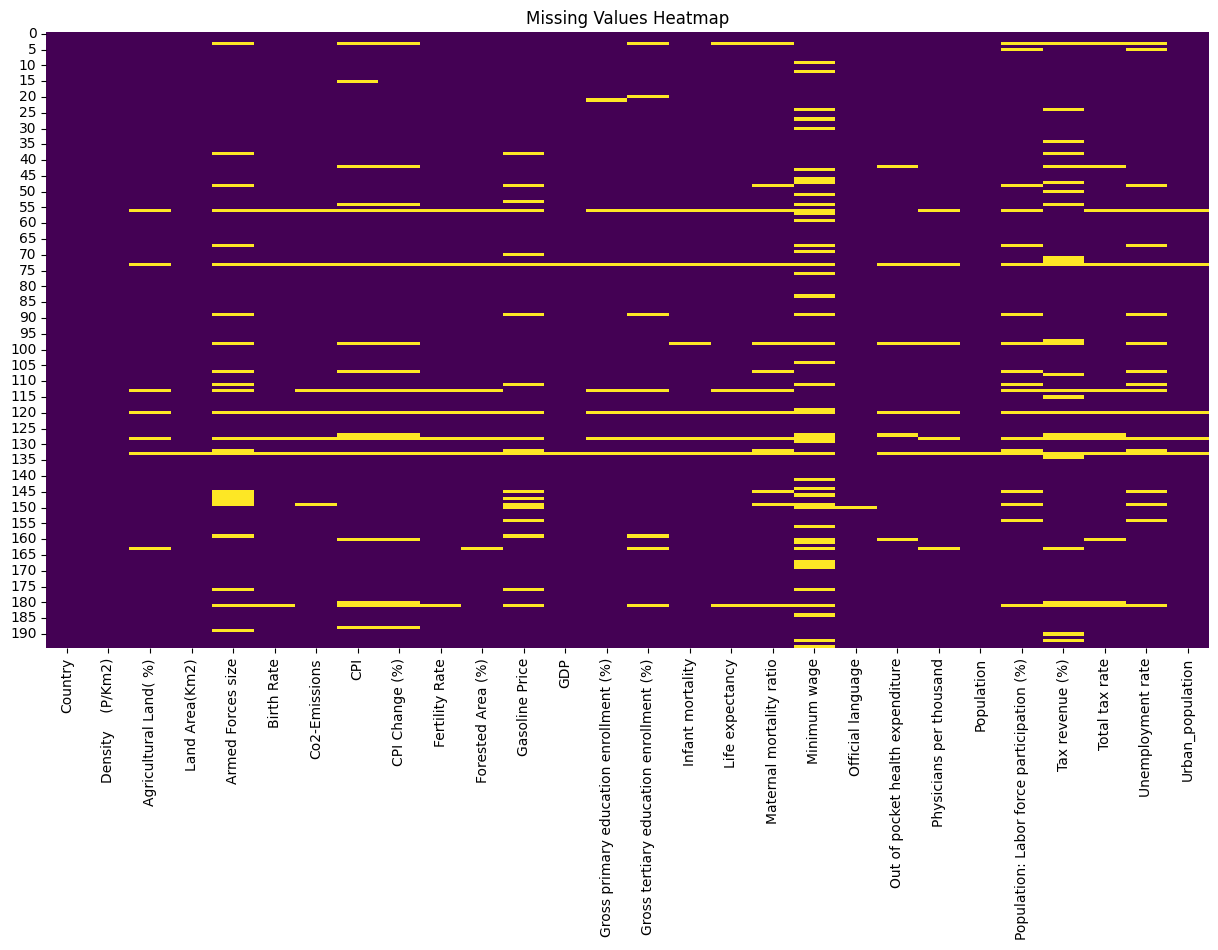

In [96]:
# Create a heatmap of missing values
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

##INFERENCE:
Minimum wage has the highest number of null values.

####Handling Null Values using KNN Imputation

In [97]:
from sklearn.impute import KNNImputer

# Create a k-NN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data
df[numeric_columns] = knn_imputer.fit_transform(df[numeric_columns])

In [98]:
df.isnull().sum()

Country                                      0
Density    (P/Km2)                           0
Agricultural Land( %)                        0
Land Area(Km2)                               0
Armed Forces size                            0
Birth Rate                                   0
Co2-Emissions                                0
CPI                                          0
CPI Change (%)                               0
Fertility Rate                               0
Forested Area (%)                            0
Gasoline Price                               0
GDP                                          0
Gross primary education enrollment (%)       0
Gross tertiary education enrollment (%)      0
Infant mortality                             0
Life expectancy                              0
Maternal mortality ratio                     0
Minimum wage                                 0
Official language                            1
Out of pocket health expenditure             0
Physicians pe

### WILL NOT DROP NULL VALUES FOR CATEGORICAL VARIABLES AS IT CAN AFFECT THE EDA

##OBSERVING OUTLIERS :

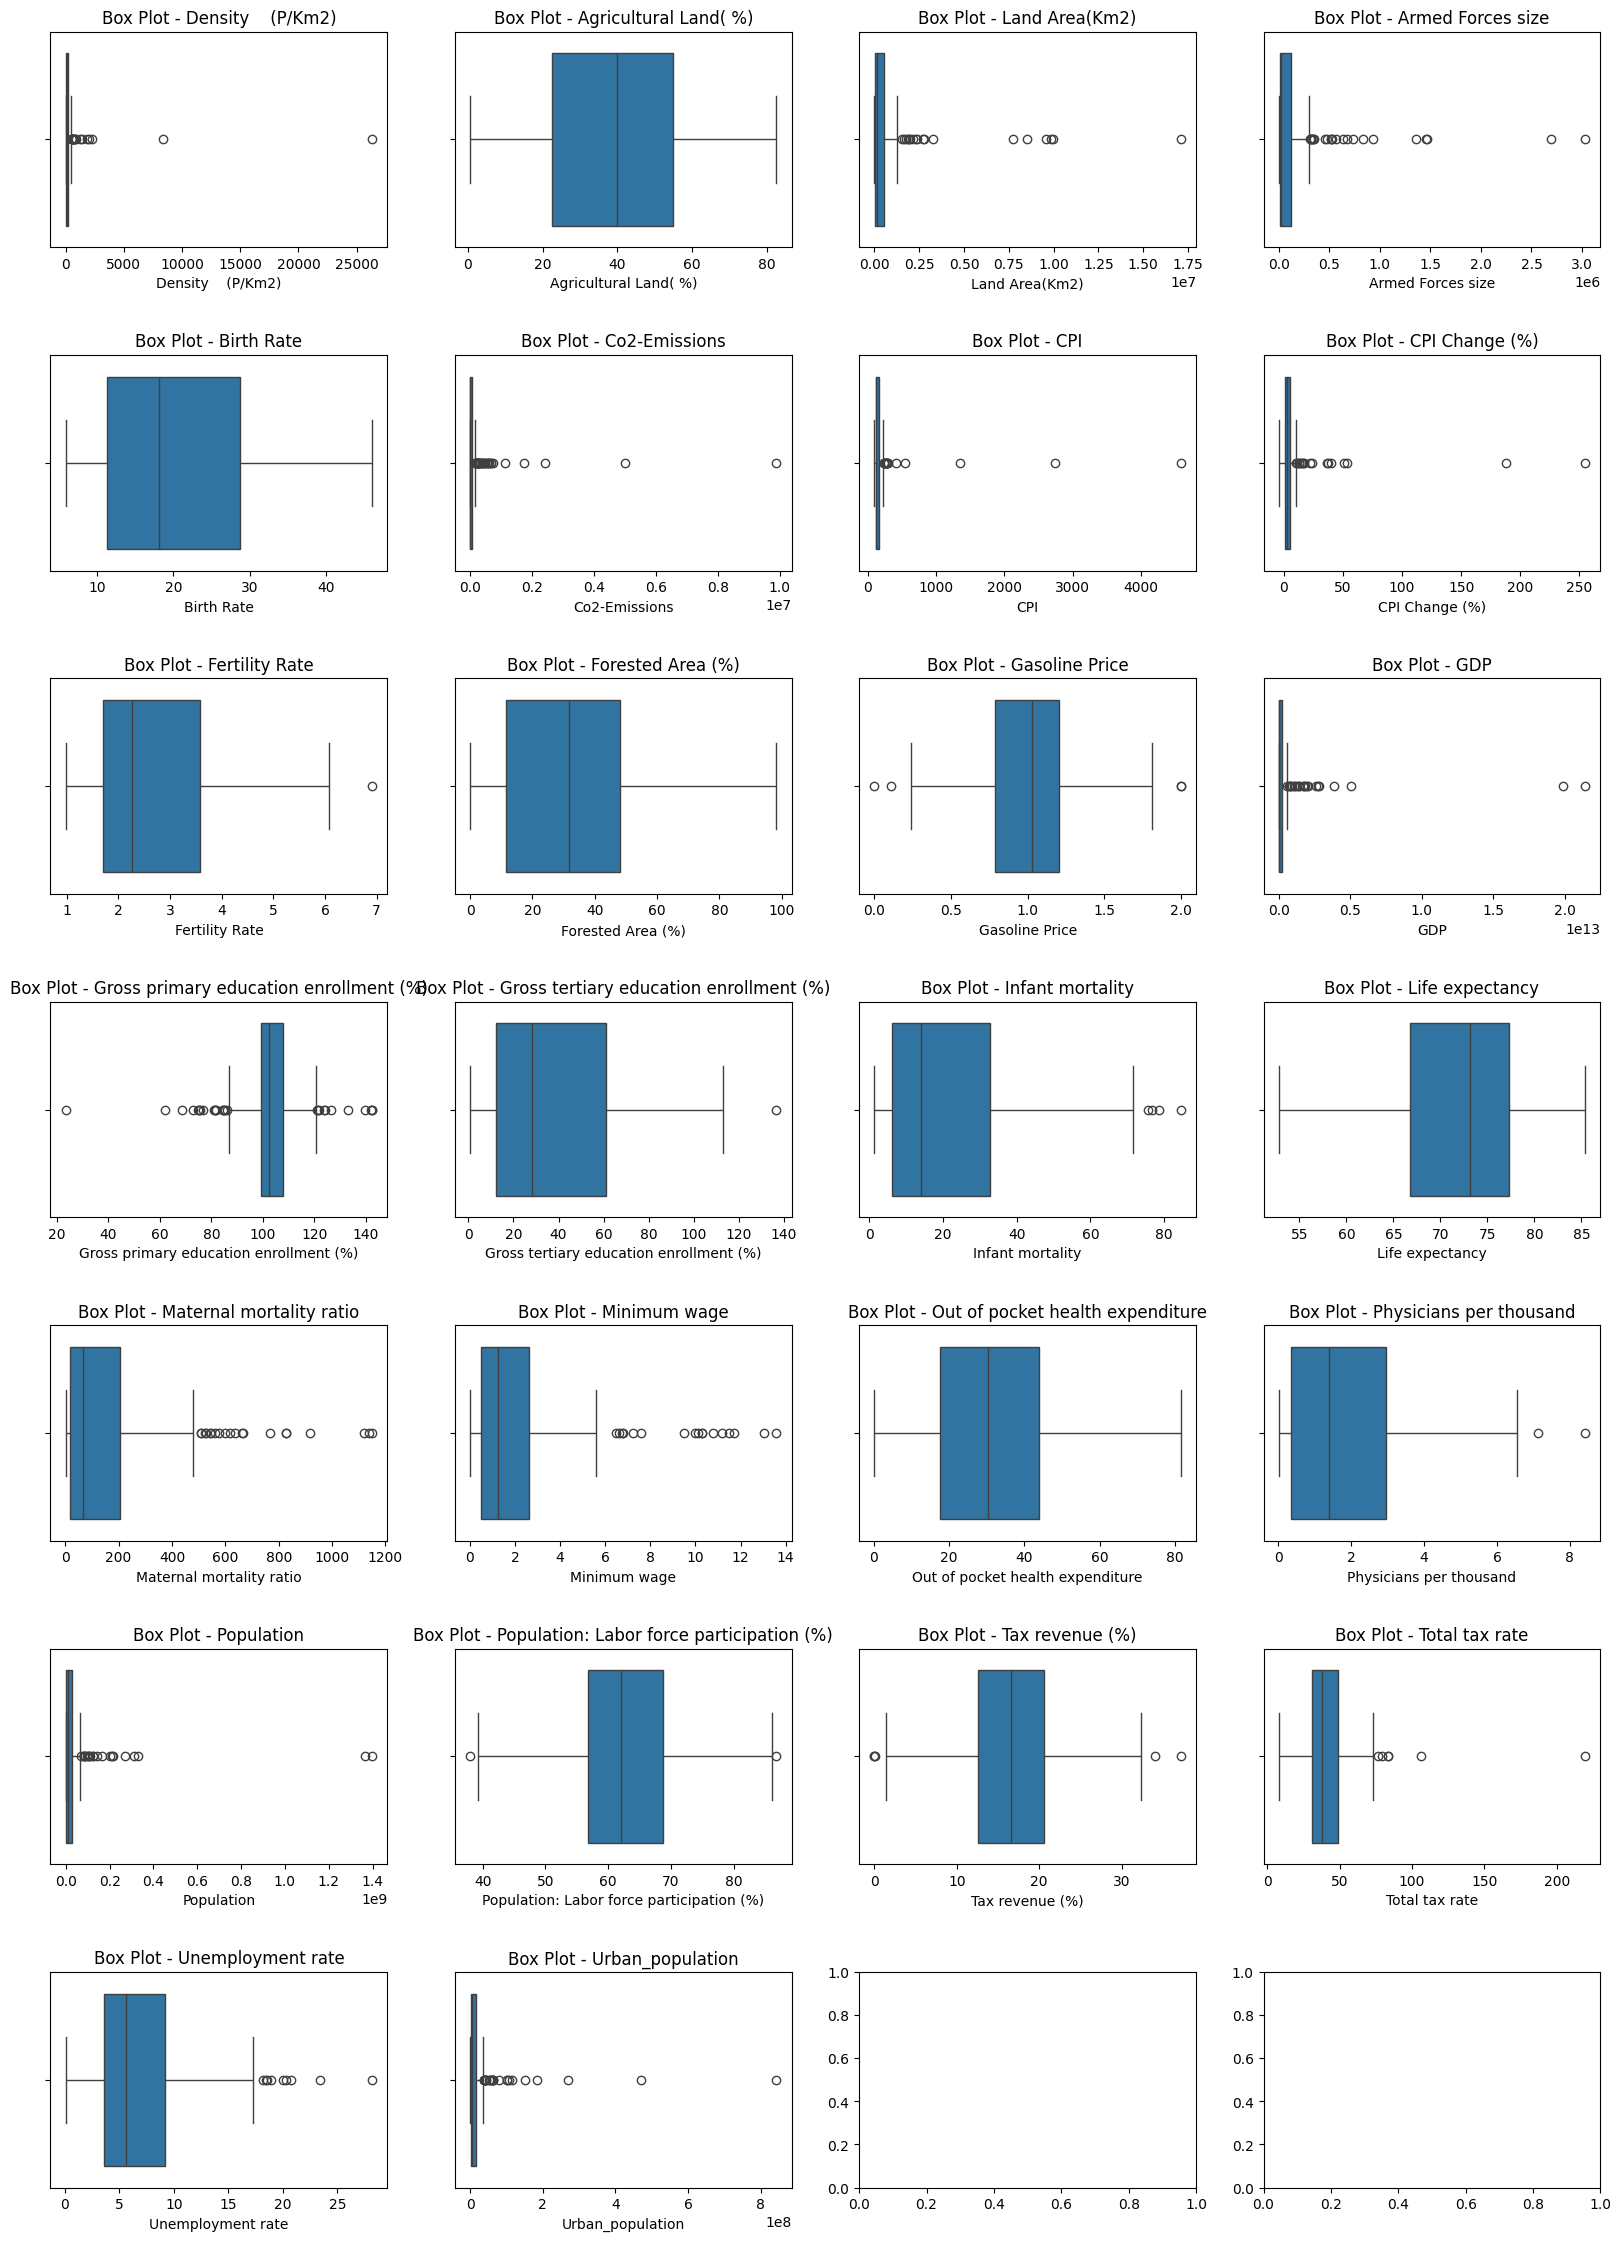

In [99]:
# Select only numeric columns
numeric_df = df[numeric_columns]

# Calculate the number of rows and columns needed for the grid
num_cols = len(numeric_df.columns)
num_rows = (num_cols - 1) // 4 + 1

# Set up subplots for each numeric column
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, 4 * num_rows))
fig.subplots_adjust(hspace=0.5)

# Create box plots for each numeric column
for i, column in enumerate(numeric_df.columns):
    row = i // 4
    col = i % 4
    sns.boxplot(x=column, data=numeric_df, ax=axes[row, col])
    axes[row, col].set_title(f"Box Plot - {column}")

plt.show()


## EDA

In [100]:
df.nunique()

Country                                      195
Density    (P/Km2)                           137
Agricultural Land( %)                        175
Land Area(Km2)                               195
Armed Forces size                            115
Birth Rate                                   175
Co2-Emissions                                191
CPI                                          190
CPI Change (%)                                99
Fertility Rate                               145
Forested Area (%)                            168
Gasoline Price                               110
GDP                                          195
Gross primary education enrollment (%)       148
Gross tertiary education enrollment (%)      181
Infant mortality                             150
Life expectancy                              140
Maternal mortality ratio                     125
Minimum wage                                 149
Official language                             77
Out of pocket health

In [101]:
df.describe()

,Density (P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,Maternal mortality ratio,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
count,195.000000,195.000000,1.950000e+02,1.950000e+02,195.000000,1.950000e+02,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,1.950000e+02,195.000000,195.000000,195.000000,195.000000,1.950000e+02
mean,356.764103,39.133641,6.919805e+05,1.415559e+05,20.259836,1.749773e+05,186.828728,6.620615,2.710472,32.139897,...,163.346667,2.175867,32.482051,1.830277,4.077300e+07,62.655692,16.585949,41.086872,7.019087,2.206947e+07
std,1982.888967,21.409819,1.916933e+06,3.598486e+05,9.875635,8.249038e+05,380.375829,23.443531,1.269696,23.537008,...,229.243679,2.697382,18.964210,1.667942,1.460173e+08,10.075549,6.537472,20.047303,4.882923,7.456690e+07
min,2.000000,0.600000,0.000000e+00,0.000000e+00,5.900000,1.100000e+01,99.030000,-4.300000,0.980000,0.000000,...,2.000000,0.010000,0.200000,0.010000,8.360000e+02,38.000000,0.000000,8.000000,0.090000,5.464000e+03
25%,35.500000,22.650000,2.445650e+04,7.000000e+03,11.350000,2.033500e+03,114.415000,1.000000,1.710000,11.450000,...,16.500000,0.505000,17.600000,0.345000,2.004434e+06,56.850000,12.550000,30.900000,3.590000,1.140078e+06
50%,89.000000,40.000000,1.205380e+05,2.400000e+04,18.070000,1.090200e+04,127.630000,2.500000,2.260000,31.800000,...,65.000000,1.234000,30.500000,1.374000,8.877067e+06,62.100000,16.540000,37.500000,5.650000,4.418218e+06
75%,216.500000,54.850000,5.541675e+05,1.250000e+05,28.695000,6.294550e+04,158.450000,4.750000,3.580000,48.250000,...,204.000000,2.616000,43.850000,2.950000,2.888532e+07,68.800000,20.550000,48.600000,9.224000,1.484924e+07
max,26337.000000,82.600000,1.709824e+07,3.031000e+06,46.080000,9.893038e+06,4583.710000,254.900000,6.910000,98.300000,...,1150.000000,13.590000,81.600000,8.420000,1.397715e+09,86.800000,37.200000,219.600000,28.180000,8.429340e+08


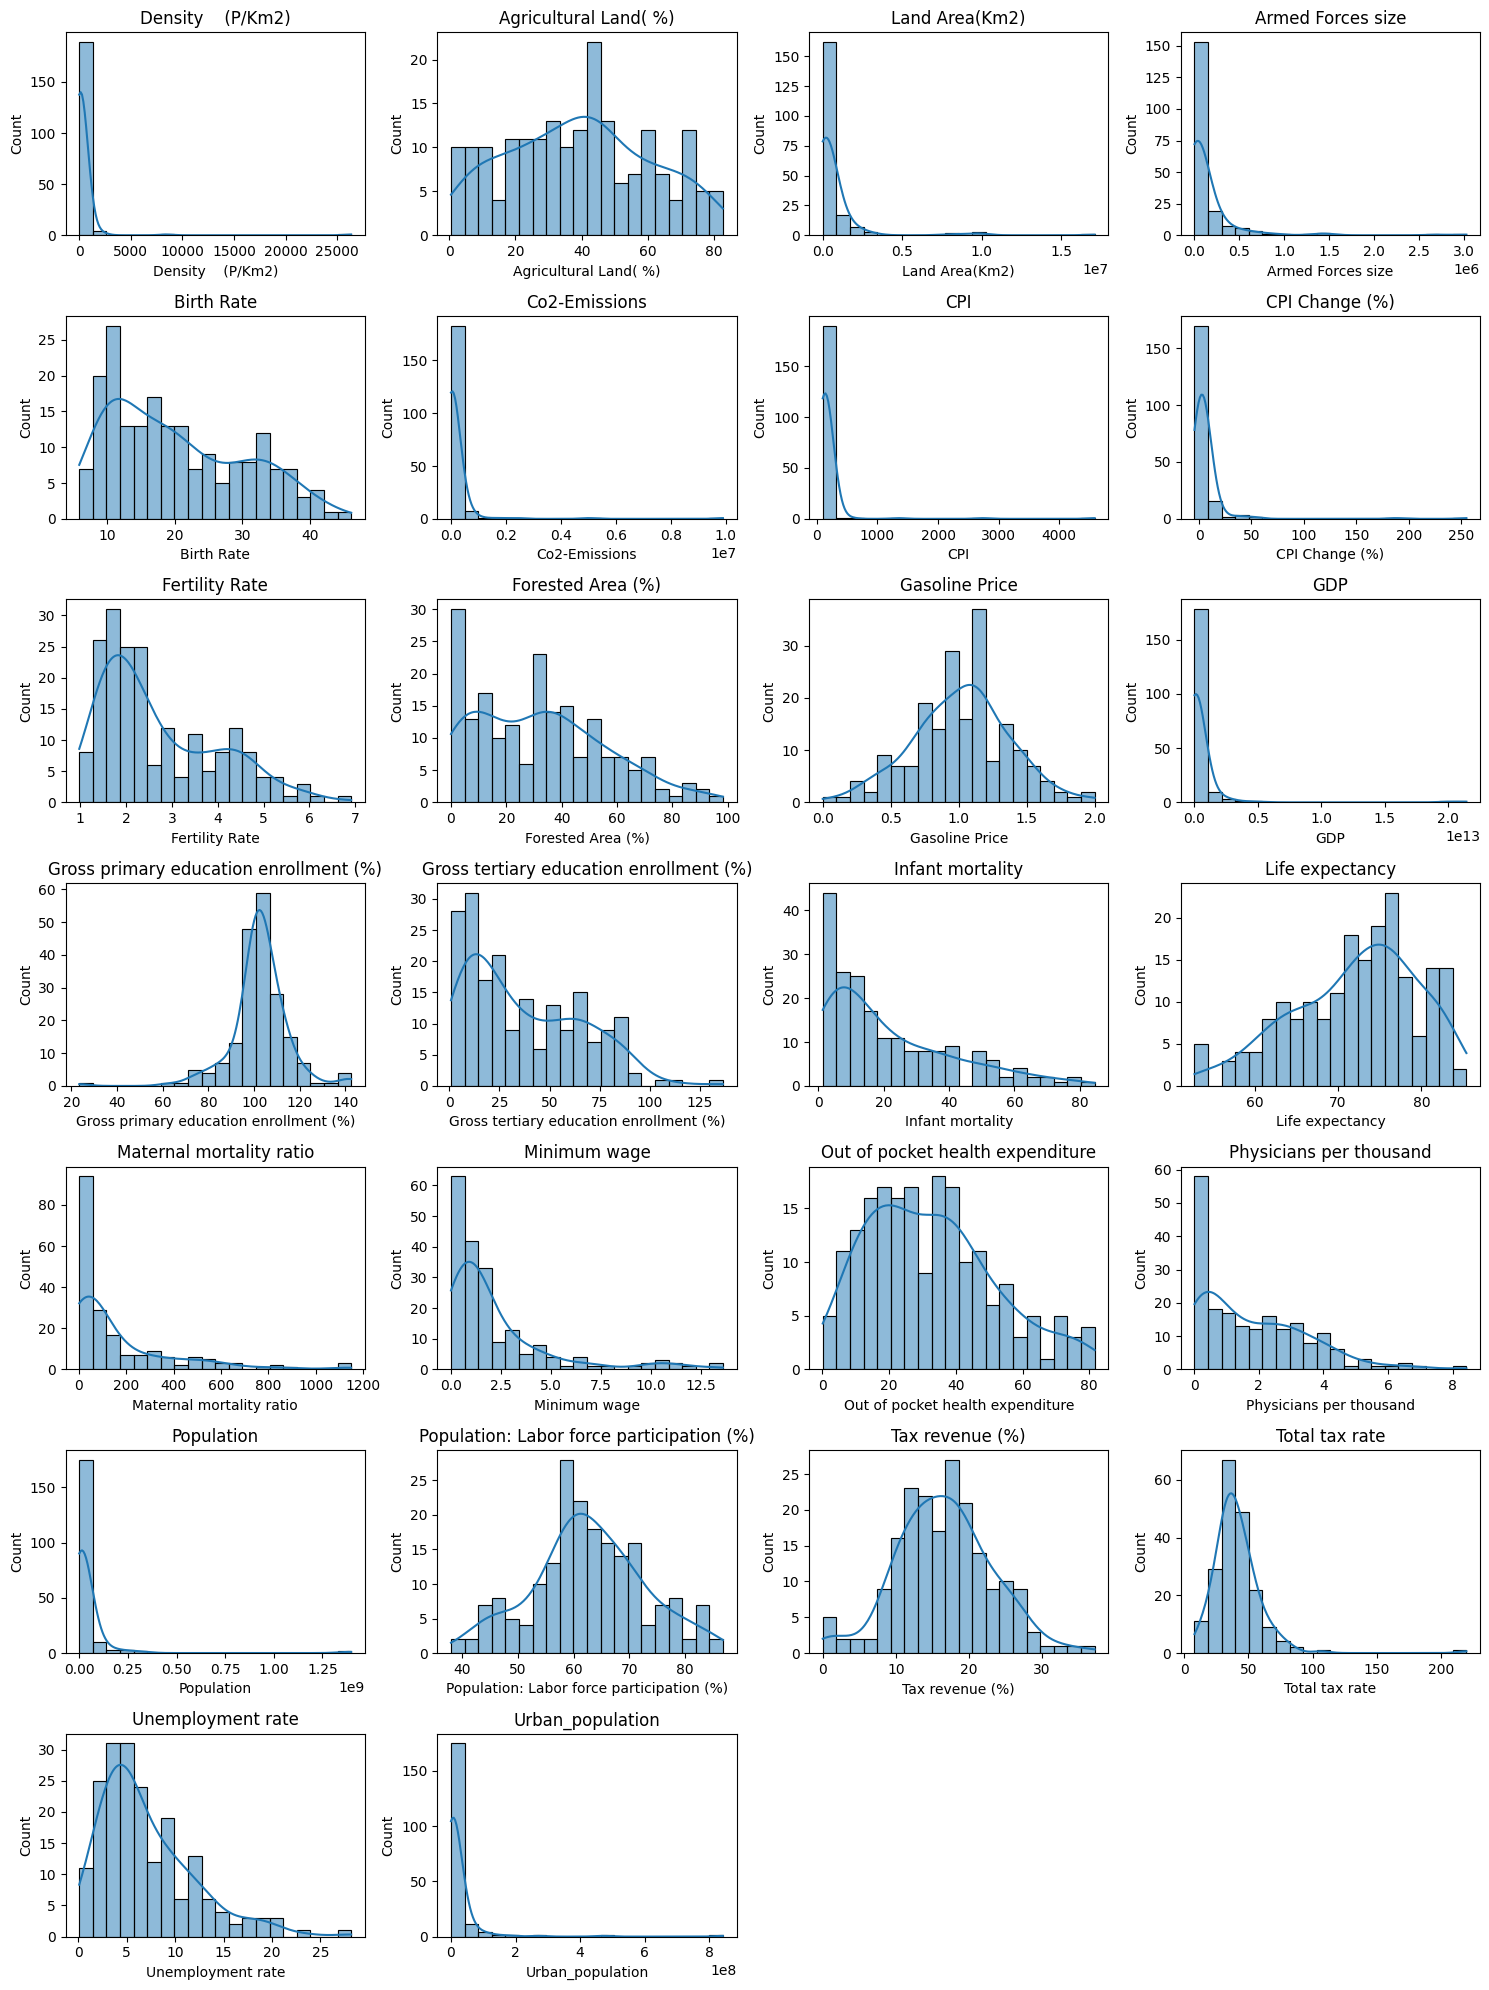

In [102]:
# Plot histograms for each numeric feature
plt.figure(figsize=(15, 20))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(7, 4, i)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

<ipython-input-103-f72b1833c66d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


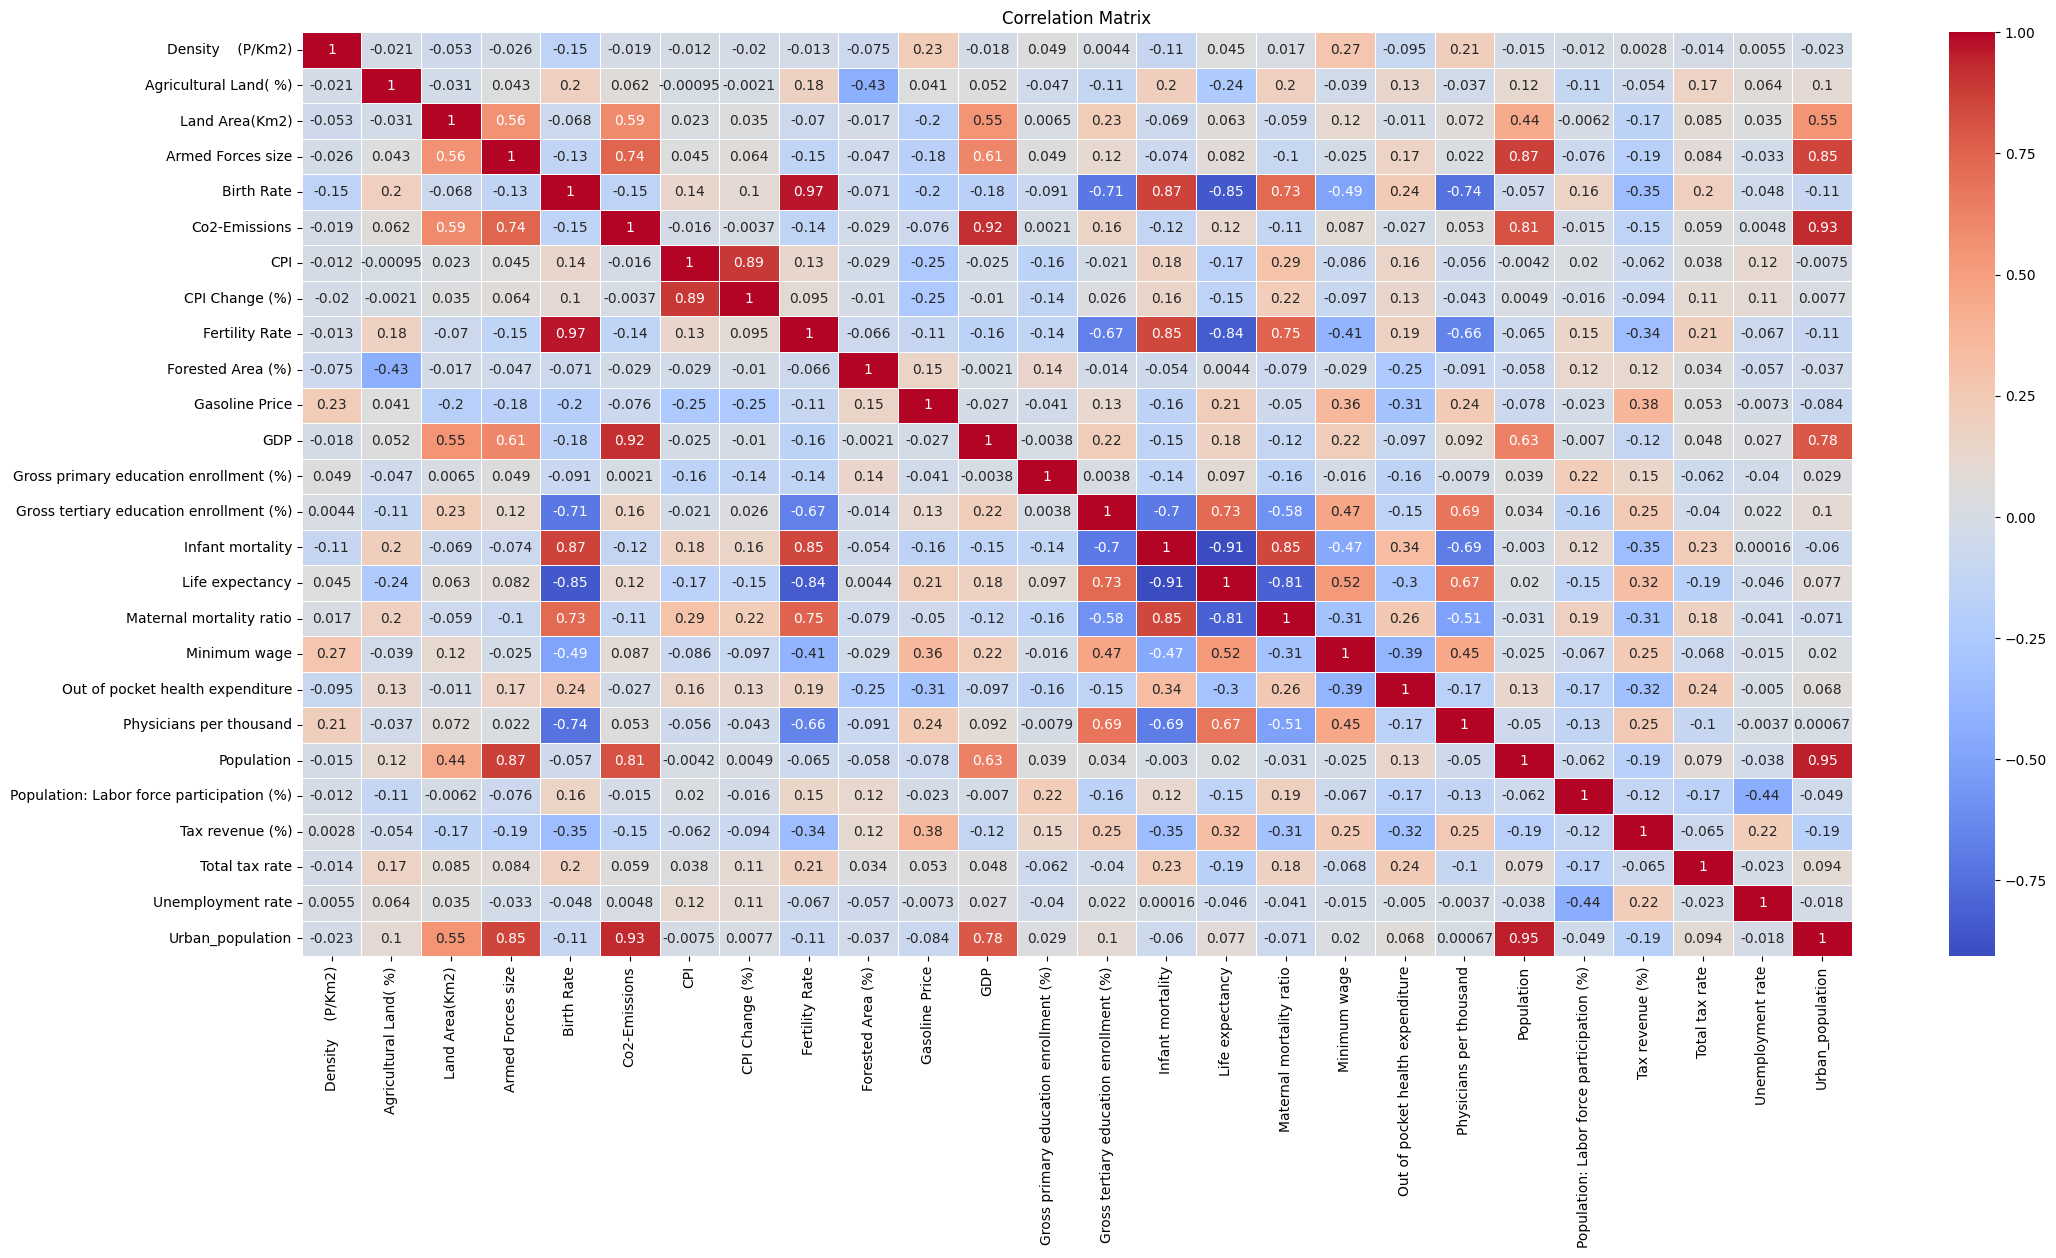

In [103]:
# Correlation Matrix
correlation_matrix = df.corr()

# Plot Correlation Heatmap
plt.figure(figsize=(25, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [104]:
# Filter columns with correlation >= 0.9 or <= -0.9
highly_correlated_columns = set()
threshold = 0.9
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            correlation_value = correlation_matrix.iloc[i, j]
            print(f"Correlation between {colname_i} and {colname_j}: {correlation_value}")

Correlation between Fertility Rate and Birth Rate: 0.9693902398141769
Correlation between GDP and Co2-Emissions: 0.9167670724084556
Correlation between Life expectancy and Infant mortality: -0.9062656973012874
Correlation between Urban_population and Co2-Emissions: 0.9264160073366834
Correlation between Urban_population and Population: 0.9501449822234622


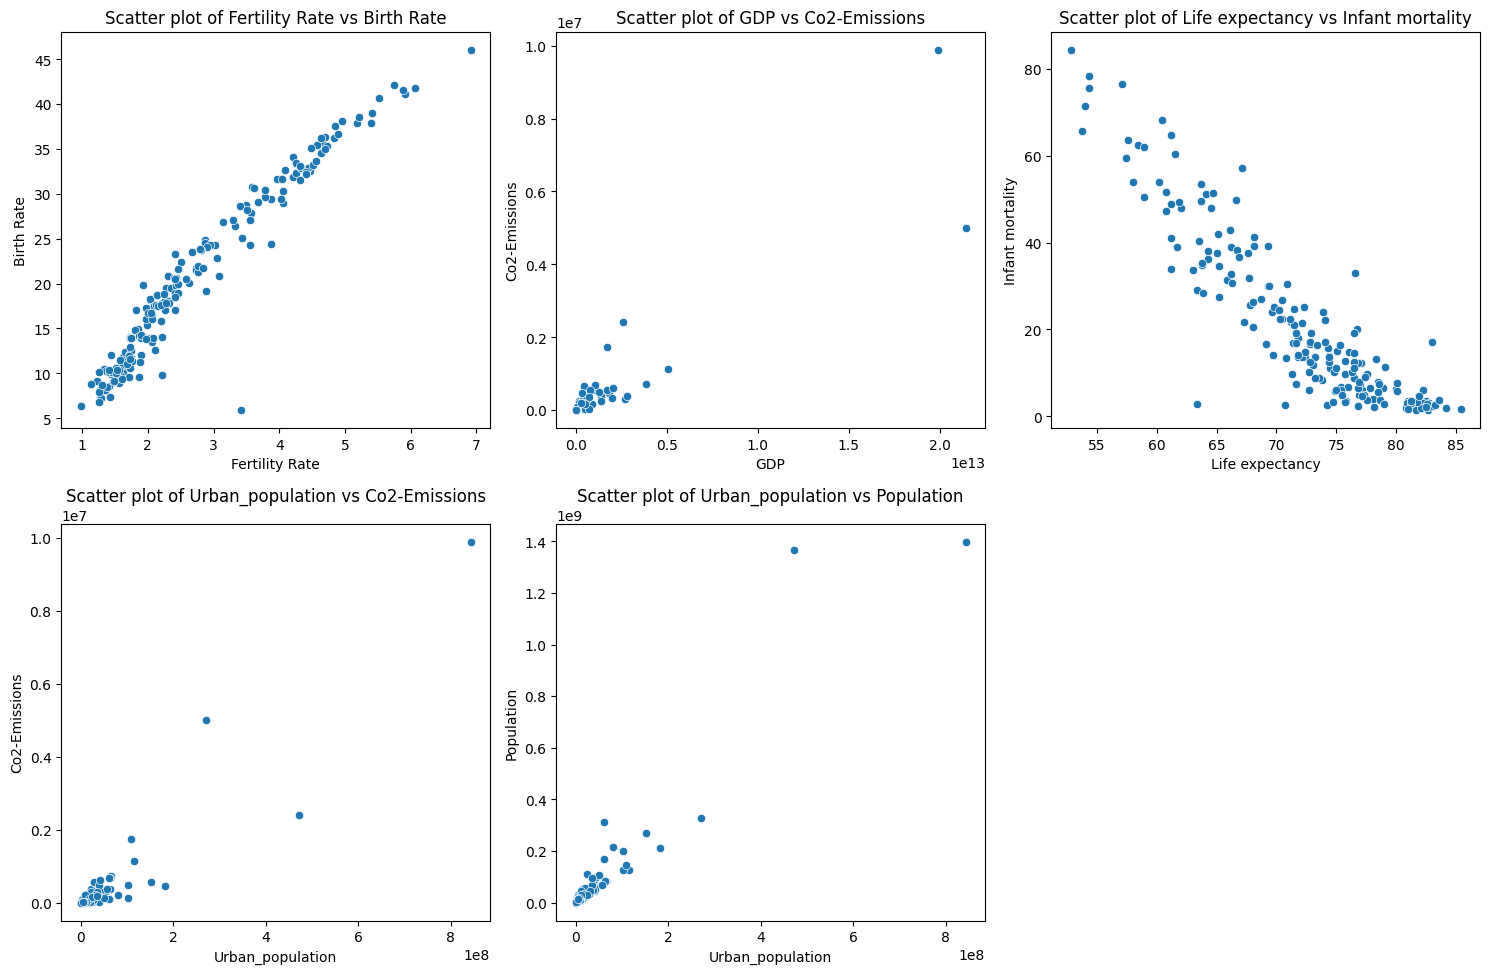

In [105]:
# List of highly correlated variable pairs
correlated_pairs = [
    ('Fertility Rate', 'Birth Rate'),
    ('GDP', 'Co2-Emissions'),
    ('Life expectancy', 'Infant mortality'),
    ('Urban_population', 'Co2-Emissions'),
    ('Urban_population', 'Population')
]

# Plot scatter plots
plt.figure(figsize=(15, 10))
for pair in correlated_pairs:
    plt.subplot(2, 3, correlated_pairs.index(pair) + 1)
    sns.scatterplot(x=pair[0], y=pair[1], data=df)
    plt.title(f'Scatter plot of {pair[0]} vs {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])

plt.tight_layout()
plt.show()

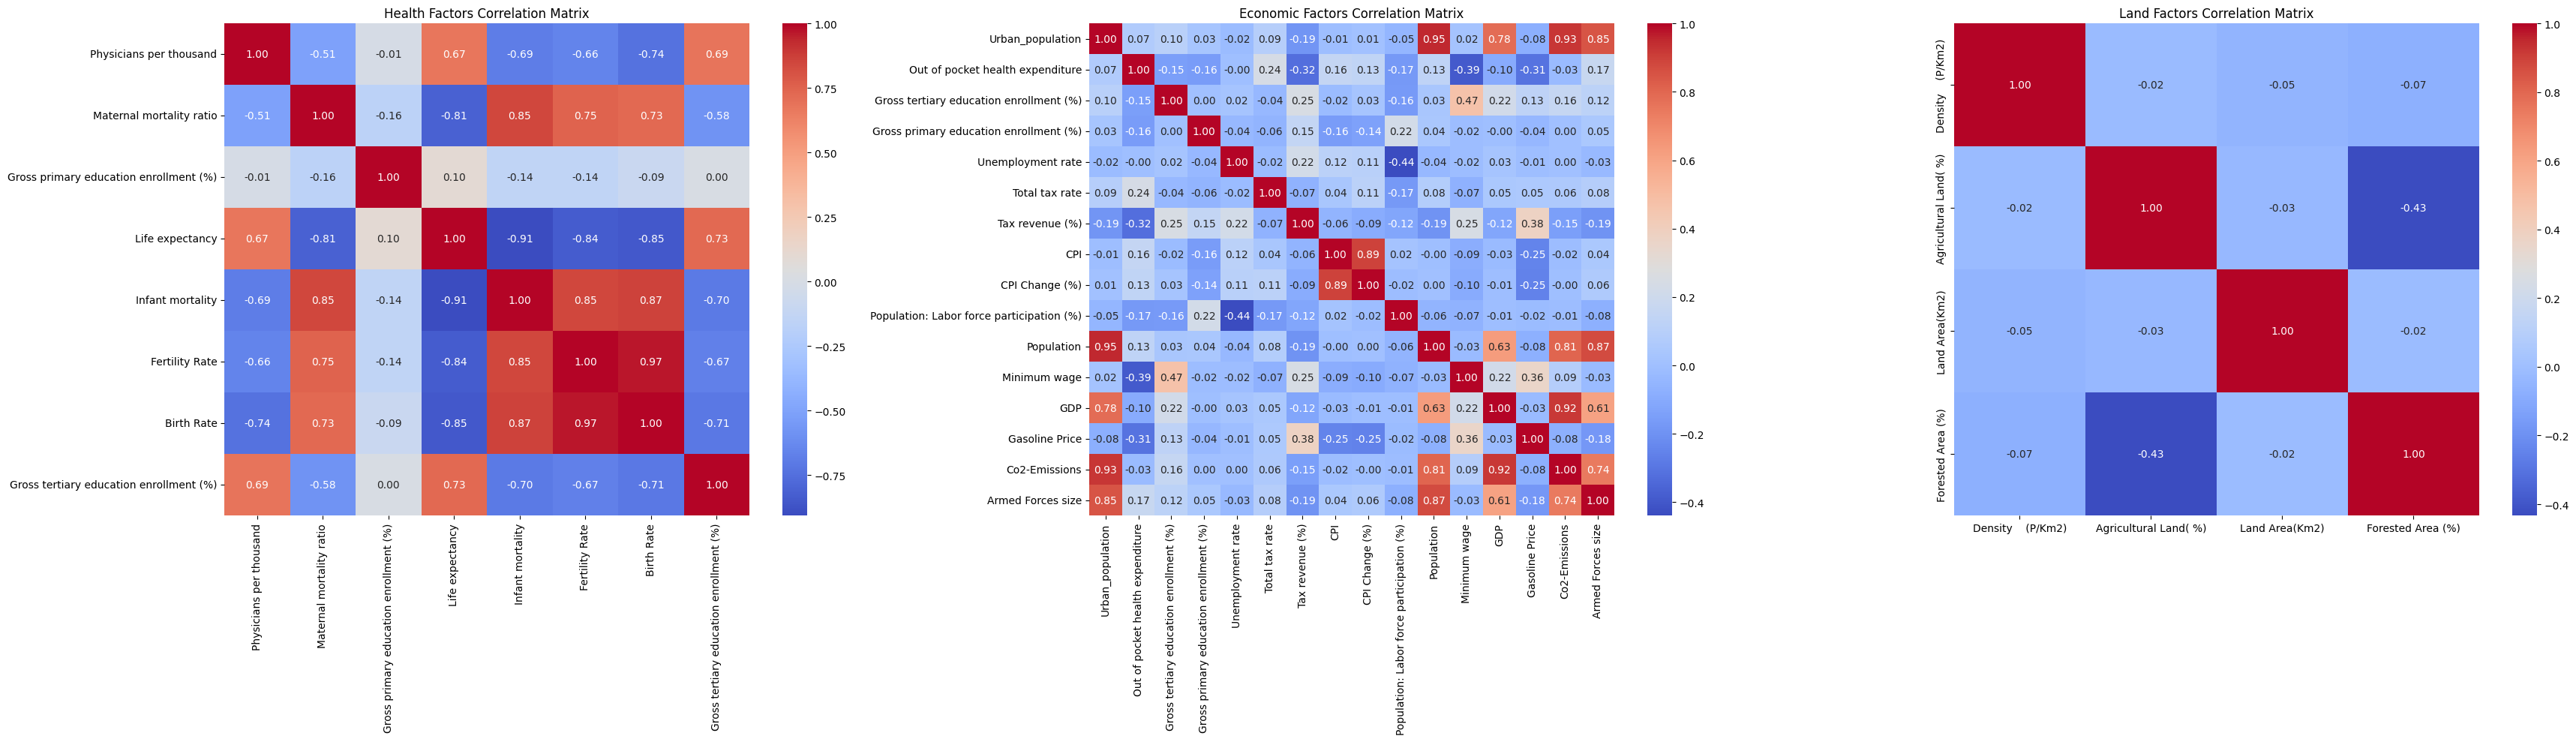

In [106]:
h_factors = ["Physicians per thousand","Maternal mortality ratio","Gross primary education enrollment (%)","Life expectancy","Infant mortality","Fertility Rate","Birth Rate","Gross tertiary education enrollment (%)"]
eco_factors = ["Urban_population","Out of pocket health expenditure","Gross tertiary education enrollment (%)","Gross primary education enrollment (%)","Unemployment rate","Total tax rate","Tax revenue (%)","CPI","CPI Change (%)","Population: Labor force participation (%)","Population","Minimum wage","GDP","Gasoline Price","Co2-Emissions","Armed Forces size"]
l_factors = ["Density    (P/Km2)","Agricultural Land( %)","Land Area(Km2)","Forested Area (%)"]

# Concatenate all relevant columns for each factor list
h_factors_df = df[h_factors]
eco_factors_df = df[eco_factors]
l_factors_df = df[l_factors]

# Plot correlation matrices
plt.figure(figsize=(35, 10))

plt.subplot(1, 3, 1)
sns.heatmap(h_factors_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Health Factors Correlation Matrix')

plt.subplot(1, 3, 2)
sns.heatmap(eco_factors_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Economic Factors Correlation Matrix')

plt.subplot(1, 3, 3)
sns.heatmap(l_factors_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Land Factors Correlation Matrix')

plt.tight_layout()
plt.show()

In [107]:
df.loc[df['Country'] == 'India', 'GDP']

77    2.611000e+12
Name: GDP, dtype: float64

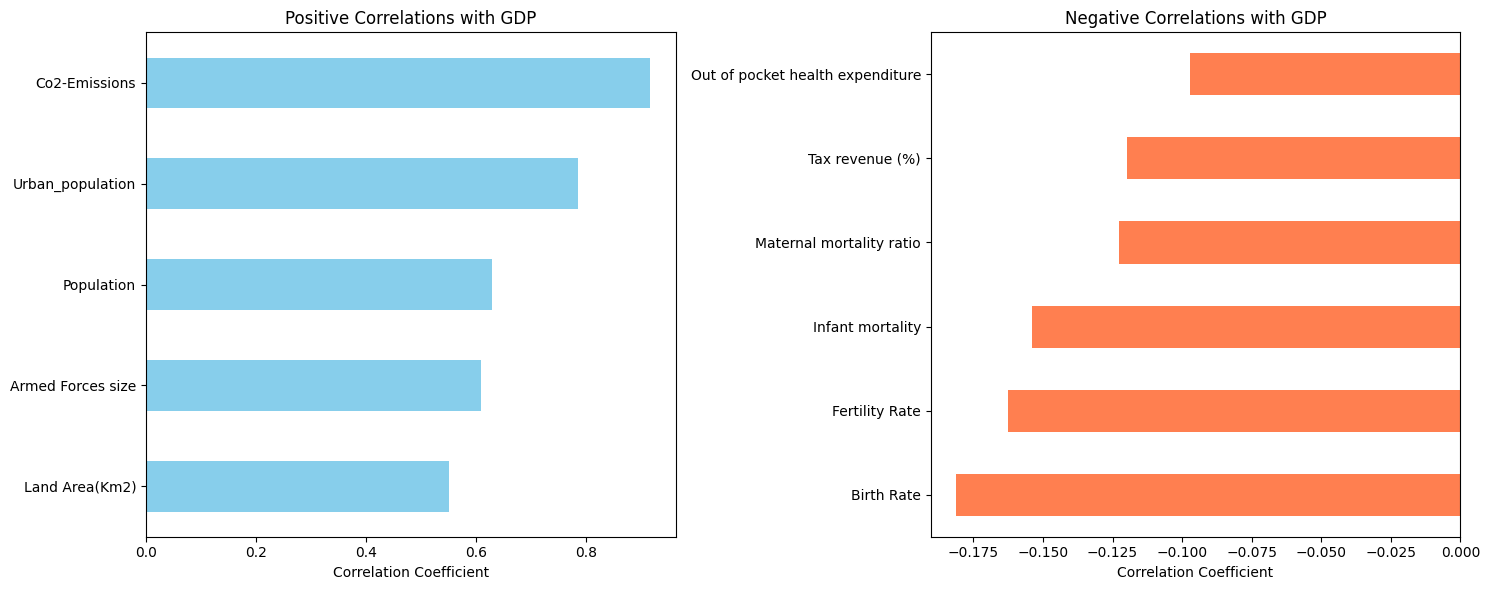

In [108]:
# Filter variables with correlation
positive_correlations = correlation_matrix['GDP'][(correlation_matrix['GDP'] > 0.50) & (correlation_matrix['GDP'] < 1.0)]
negative_correlations =correlation_matrix['GDP'][(correlation_matrix['GDP'] < -0.09 ) & (correlation_matrix['GDP'] > -1.0)]



# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot positive correlations
positive_correlations.sort_values().plot(kind='barh', color='skyblue', ax=axes[0])
axes[0].set_xlabel('Correlation Coefficient')
axes[0].set_title('Positive Correlations with GDP')

# Plot negative correlations
negative_correlations.sort_values().plot(kind='barh', color='coral', ax=axes[1])
axes[1].set_xlabel('Correlation Coefficient')
axes[1].set_title('Negative Correlations with GDP')

plt.tight_layout()
plt.show()

According to the visualization of the correlations of 'GDP' with other features,  to increase GDP , India should increase it's Co2-Emissions, Urban Population, Population.Also to prevent it from decreasing it should not let the features like Fertility Rate, Birth Rate, Infant mortality rate, Tax revenue,Out of pocket health expenditure increase, but since there correlation is not less than -0.15 , it should not effect it much.

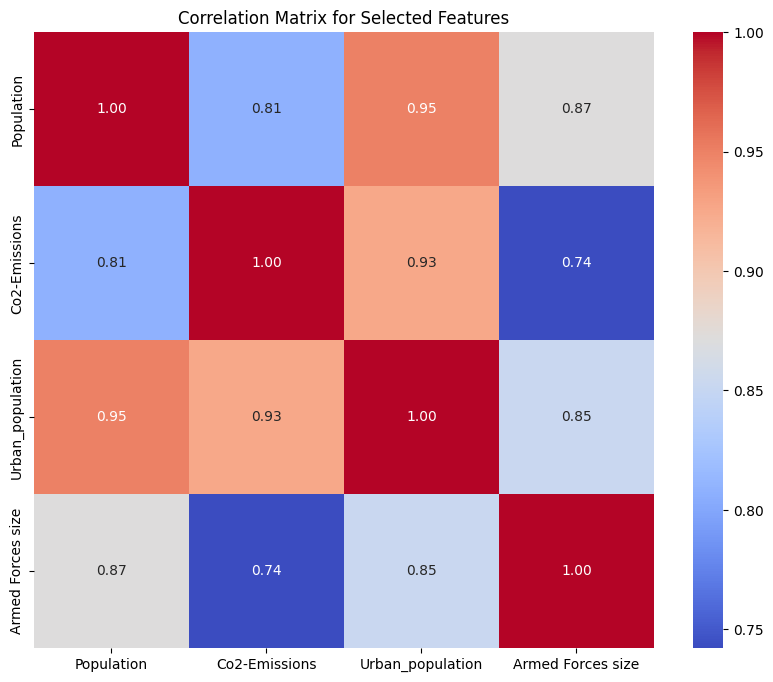

In [109]:
# List of features
selected_features = ['Population', 'Co2-Emissions', 'Urban_population', 'Armed Forces size']

# Subset the dataframe with selected features
selected_df = df[selected_features]

# Calculate the correlation matrix
correlation_matrix_selected = selected_df.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Selected Features')
plt.show()


Since they are all highly correlated, increase any one of it , would increase all of them, therefore I would suggest increasing 'Urban_Population' to increase 'GDP'

Lets study another feature : "Birth Rate" , of another country

In [110]:
df.loc[df['Country'] == 'Philippines', 'Physicians per thousand']

138    0.6
Name: Physicians per thousand, dtype: float64

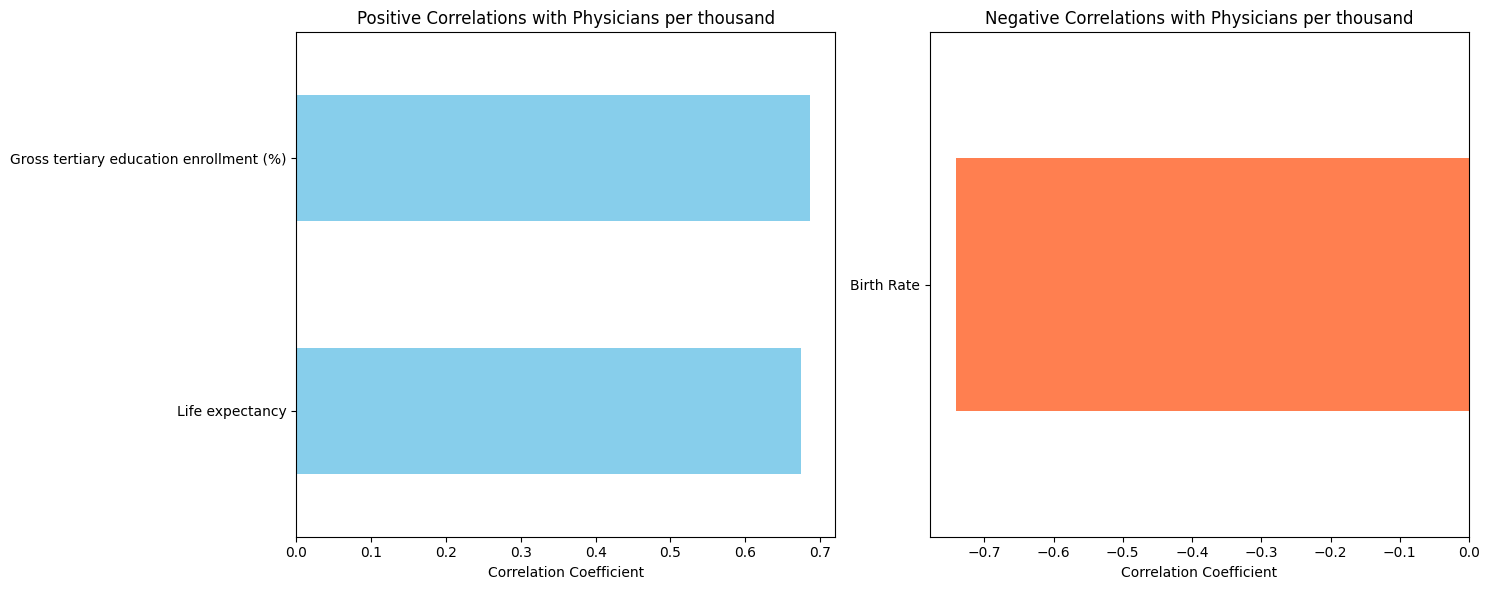

In [111]:
# Filter variables with correlation
positive_correlations = correlation_matrix['Physicians per thousand'][(correlation_matrix['Physicians per thousand'] > 0.60) & (correlation_matrix['Physicians per thousand'] < 1.0)]
negative_correlations =correlation_matrix['Physicians per thousand'][(correlation_matrix['Physicians per thousand'] < -0.69 ) & (correlation_matrix['Physicians per thousand'] > -1.0)]



# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot positive correlations
positive_correlations.sort_values().plot(kind='barh', color='skyblue', ax=axes[0])
axes[0].set_xlabel('Correlation Coefficient')
axes[0].set_title('Positive Correlations with Physicians per thousand')

# Plot negative correlations
negative_correlations.sort_values().plot(kind='barh', color='coral', ax=axes[1])
axes[1].set_xlabel('Correlation Coefficient')
axes[1].set_title('Negative Correlations with Physicians per thousand')

plt.tight_layout()
plt.show()

We can say that by increasing Life Expectancy, Gross tertiary education enrollment, we can increase the Physicians per thousand. And to stop it from decreasing, we have to control the increment of Birth Rate

In [112]:
# Set a range around the GDP of India
gdp_range = 0.3  # You can adjust this range based on your criteria

# Filter countries with GDP in the specified range
similar_gdp_countries = df[(df['GDP'] >= (2.611000e+12 - gdp_range * 2.611000e+12)) & (df['GDP'] <= (2.611000e+12 + gdp_range * 2.611000e+12))]

# Display the result
print(similar_gdp_countries['Country'])


23             Brazil
60             France
77              India
83              Italy
162       South Korea
185    United Kingdom
Name: Country, dtype: object


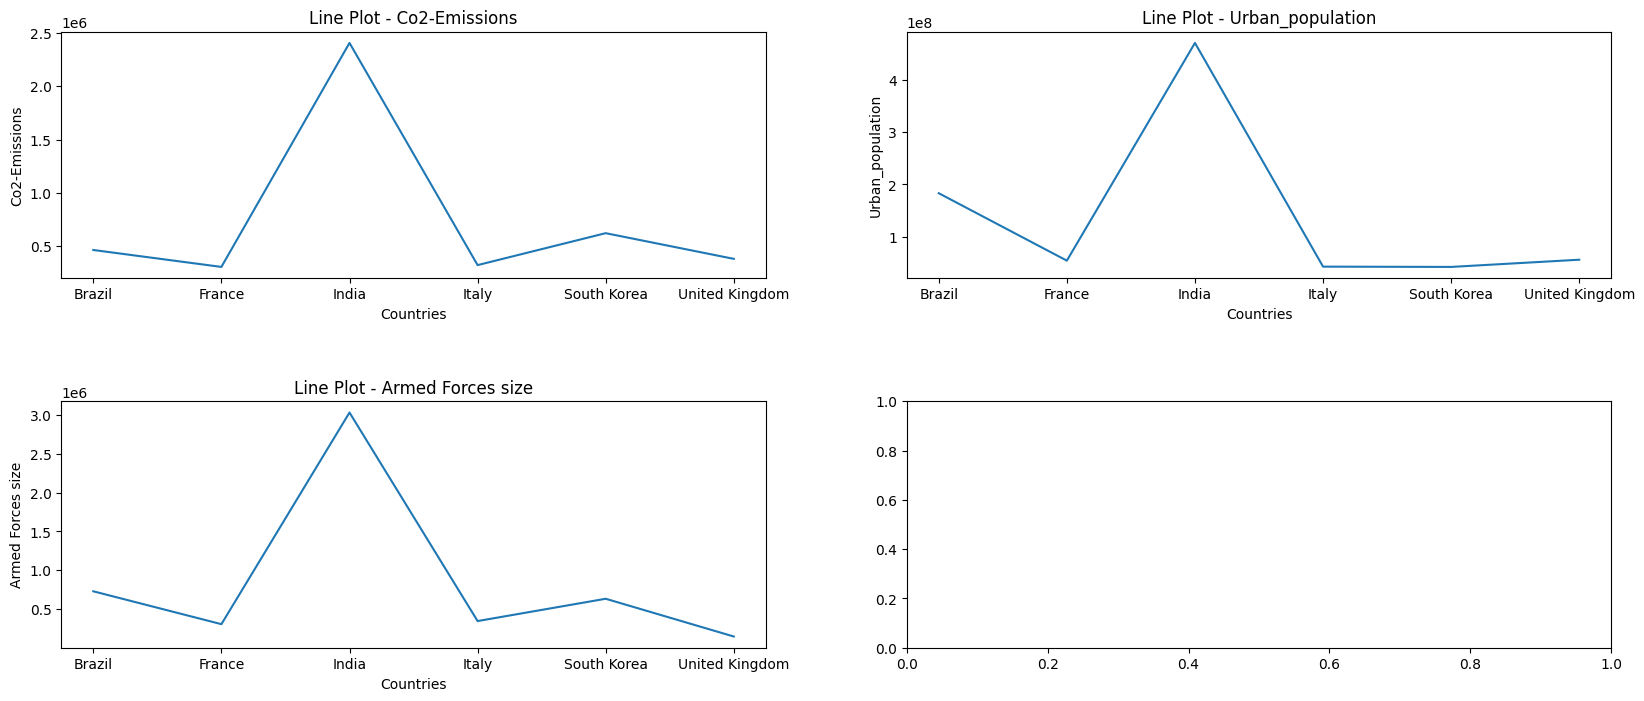

In [158]:
# Select only numeric columns for the selected countries
numeric_df_selected = df[df['Country'].isin(selected_countries)][selected_features]

# Add selected_countries as a new column
numeric_df_selected['Countries'] = selected_countries

# Calculate the number of rows and columns needed for the grid
num_cols = 2
num_rows = 2

# Set up subplots for each numeric column
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 4 * num_rows))
fig.subplots_adjust(hspace=0.5)

# Create line plots for each numeric column
for i, column in enumerate(numeric_df_selected.columns[1:]):  # Exclude the 'Country' column from plotting
    row = i // num_cols
    col = i % num_cols
    if column == 'Countries': continue
    sns.lineplot(x='Countries', y=column, data=numeric_df_selected, ax=axes[row, col])
    axes[row, col].set_title(f"Line Plot - {column}")

plt.show()

###CATEGORICAL VARIABLES

<ipython-input-115-78f77e2a932e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts, palette='viridis')


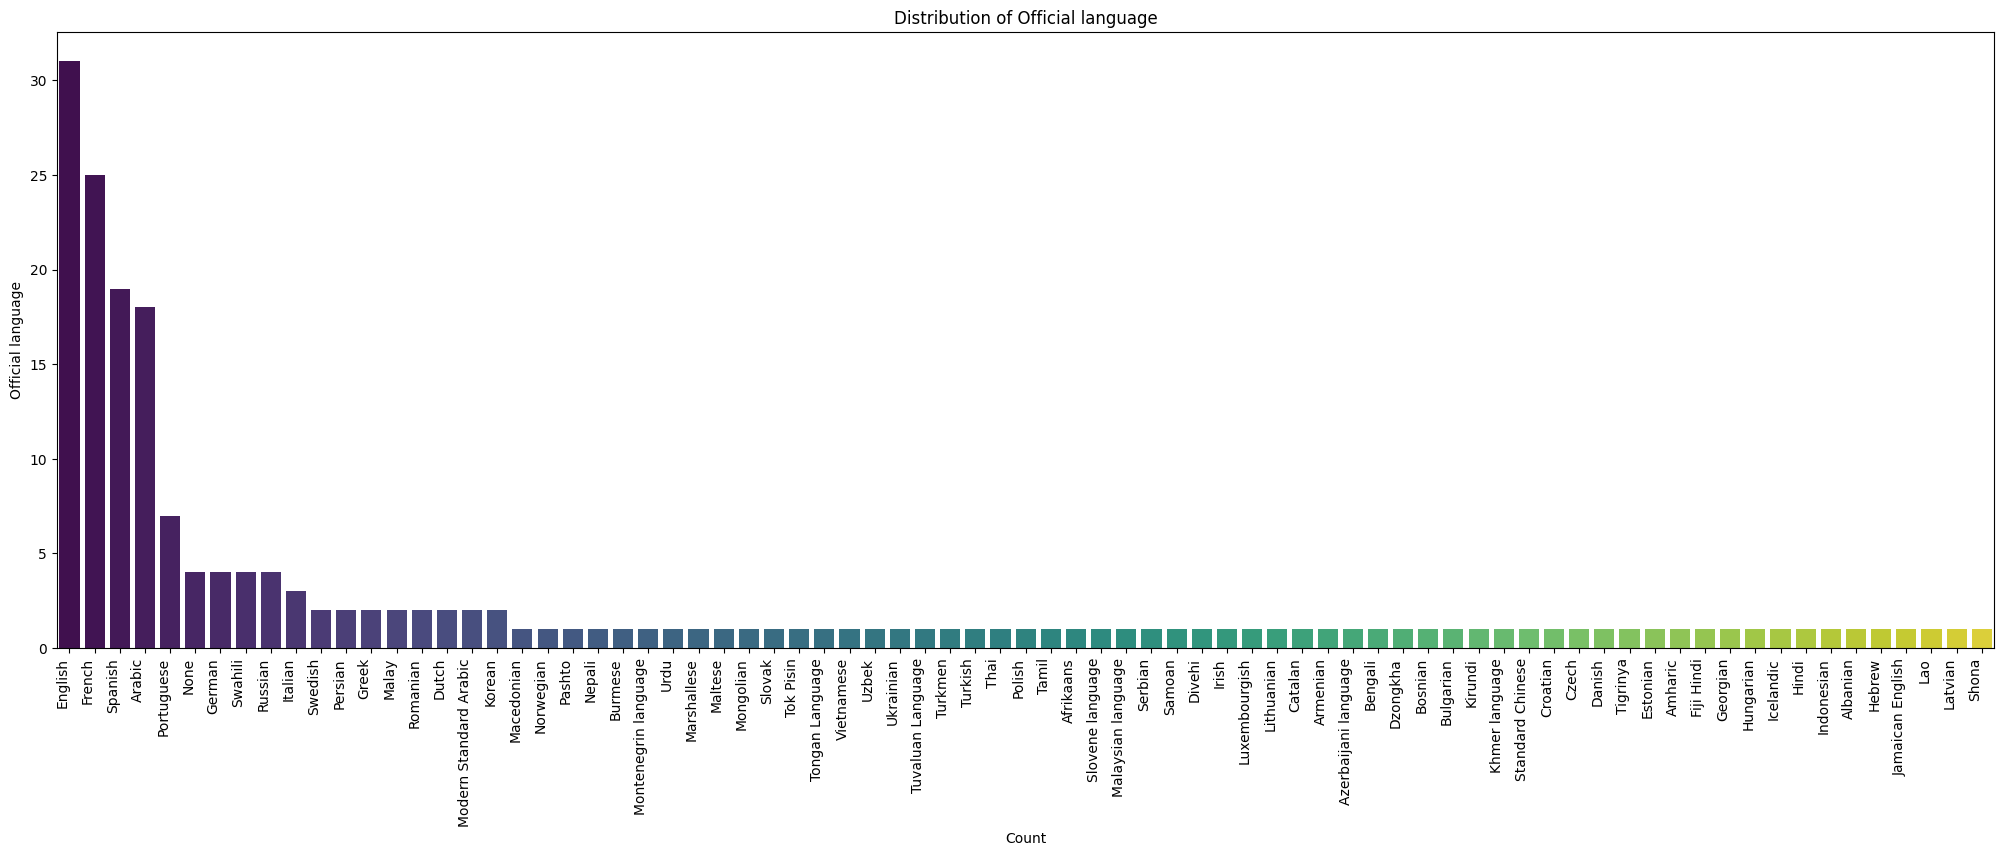

In [115]:
categorical_column = 'Official language'

# Get value counts for the categorical column
value_counts = df[categorical_column].value_counts()
# Create a horizontal bar plot
plt.figure(figsize=(25, 8))
sns.barplot(x=value_counts.index, y=value_counts, palette='viridis')
plt.title(f'Distribution of {categorical_column}')
plt.xlabel('Count')
plt.ylabel(categorical_column)
plt.xticks(rotation=90, ha='right')
plt.show()

<ipython-input-116-b490ba0c80a2>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-116-b490ba0c80a2>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


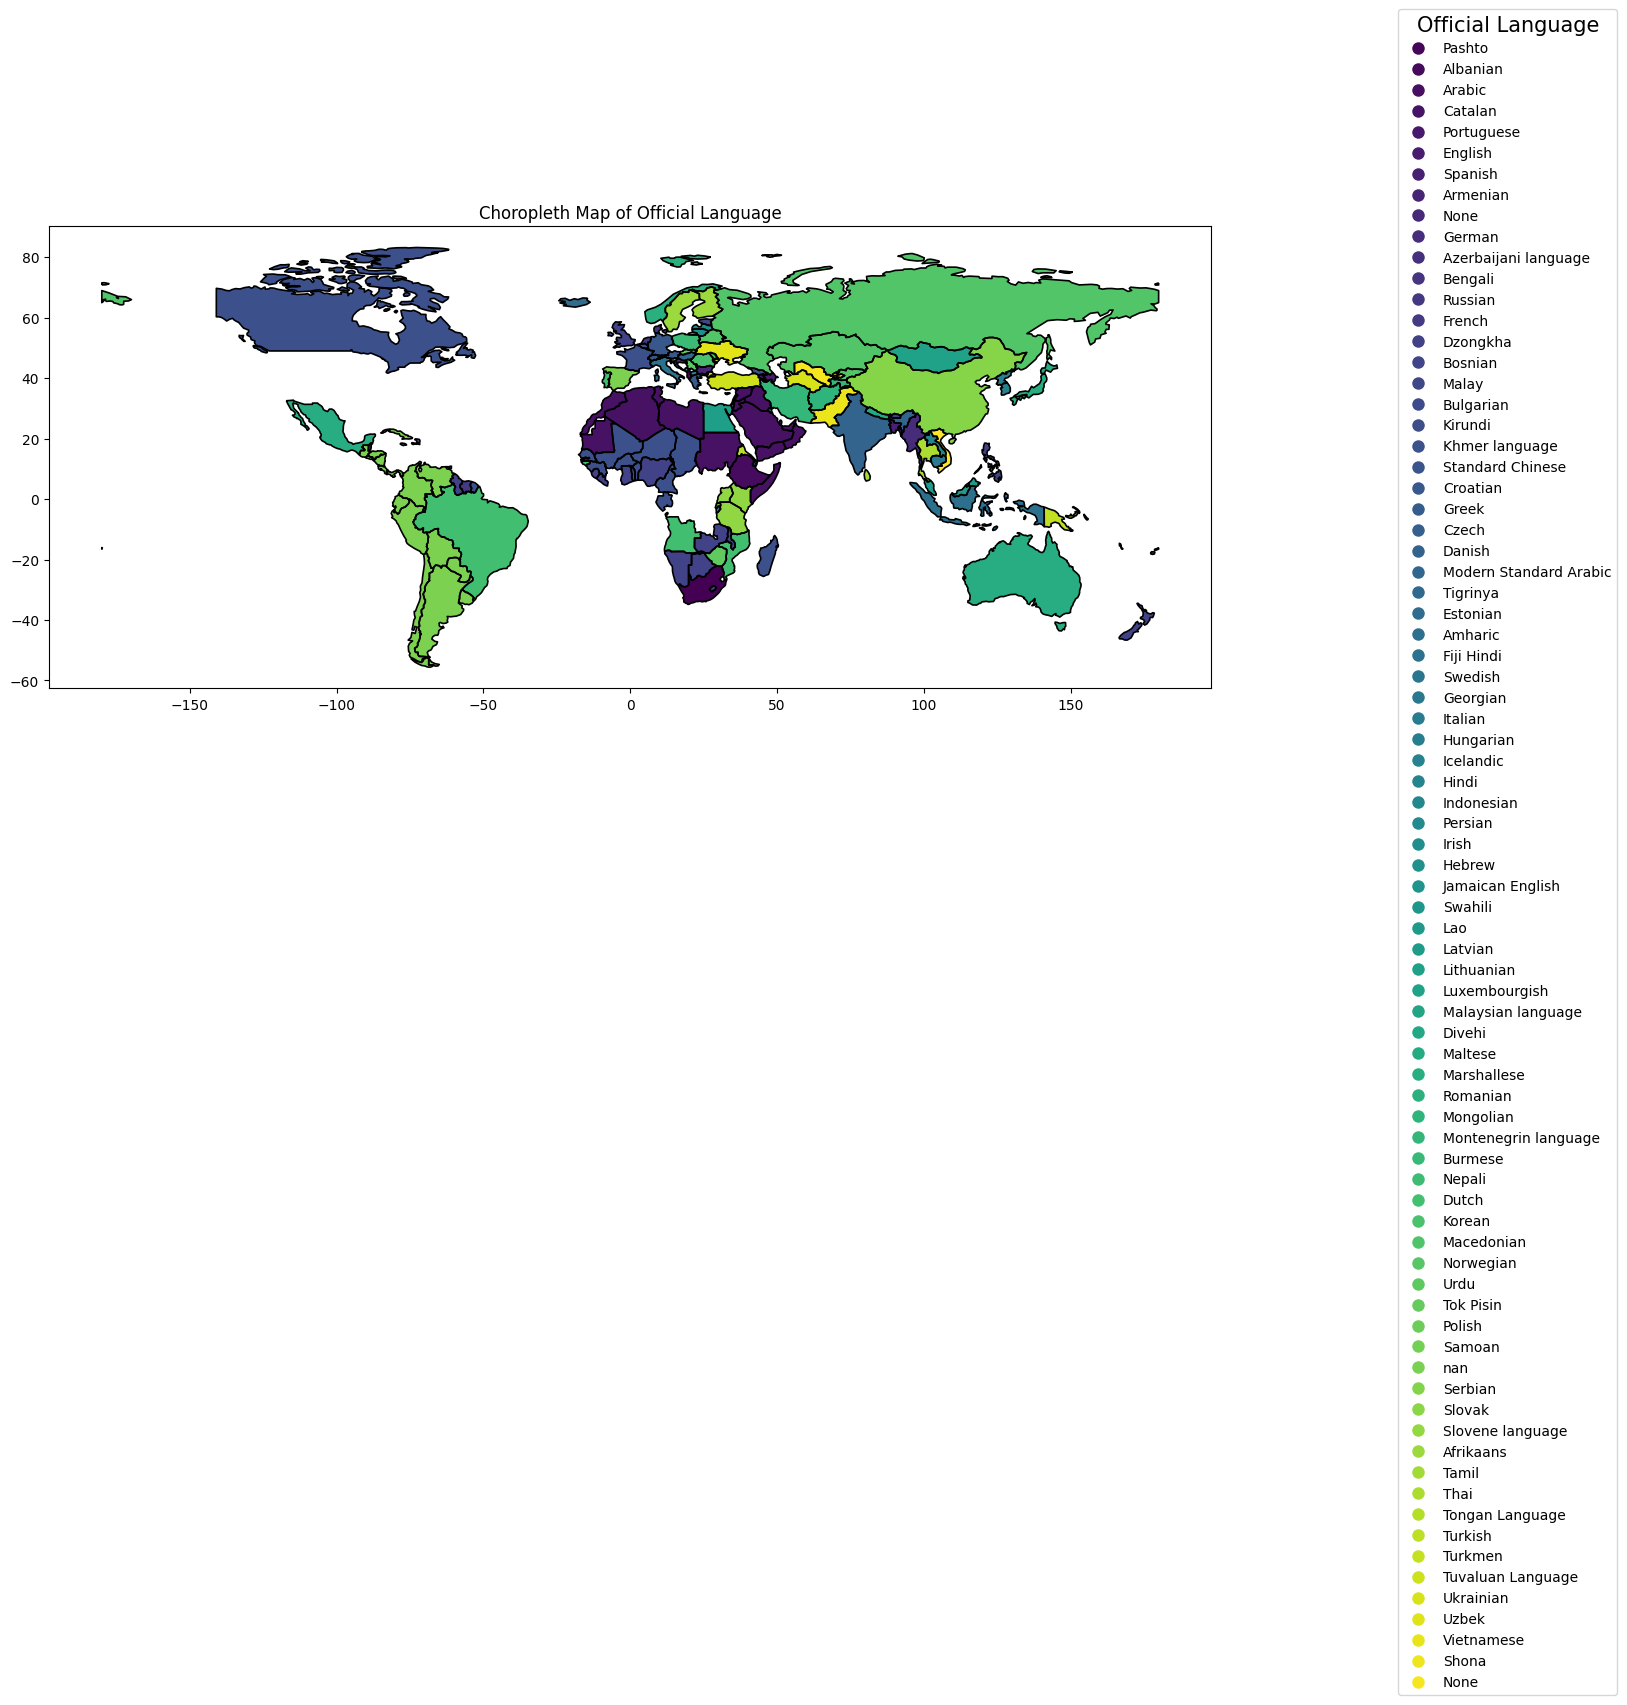

In [116]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Manually add the USA to the GeoDataFrame if it's not present
if 'United States' not in world['name'].tolist():
    usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    usa = usa[usa['name'] == 'United States']
    world = pd.concat([world, usa])

# Merge the GeoDataFrame with your DataFrame
merged = world.merge(df, left_on='name', right_on='Country')

# Create a choropleth map with boundaries marked in black
fig, ax = plt.subplots(figsize=(15, 10))
merged.boundary.plot(color='black', linewidth=1.2, ax=ax)

# Plot the choropleth map, handle None values with a specific color
p = merged.plot(column='Official language', categorical=True, legend=False, ax=ax, cmap='viridis', missing_kwds={'color': 'lightgray'})

# Create a custom legend outside the plot
colors = sns.color_palette('viridis', n_colors=len(df['Official language'].unique()) + 1)  # +1 for 'None'
labels = df['Official language'].unique().tolist() + ['None']
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in zip(labels, colors)]

# Adjust the legend and its position
legend = fig.legend(handles=handles, labels=labels, loc='upper left', bbox_to_anchor=(1.02, 0.95), title='Official Language', title_fontsize='15')
legend.set_title('Official Language', prop={'size': 15})  # Adjust the font size of the legend title

# Set plot title
plt.title('Choropleth Map of Official Language')
plt.show()
